In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr

In [2]:
carbon_data = nc.Dataset("dataset_satellite_data_carbon_dioxide.nc", 'r')


In [3]:
global_attributes = carbon_data.ncattrs()
print(global_attributes)

['activity_id', 'comment', 'contact', 'Conventions', 'creation_date', 'data_specs_version', 'frequency', 'further_info_url', 'grid', 'grid_label', 'institution', 'institute_id', 'license', 'nominal_resolution', 'product', 'realm', 'references', 'region', 'source', 'source_id', 'source_label', 'source_type', 'source_version_number', 'title', 'tracking_id', 'variable_id', 'variant_info', 'variant_label']


In [4]:
print(carbon_data.title)

C3S XCO2 v4.4


In [5]:
carbon_data = nc.Dataset("dataset_satellite_data_carbon_dioxide.nc", 'r')

# Print variable names and their attributes
for var_name in carbon_data.variables:
    print(f"Variable: {var_name}")
    print("Attributes:")
    for attr_name in carbon_data.variables[var_name].ncattrs():
        print(f"  {attr_name}: {getattr(carbon_data.variables[var_name], attr_name)}")
    print()


Variable: time
Attributes:
  standard_name: time
  long_name: time
  units: days since 1990-01-01
  calendar: standard
  axis: T
  comment: time center

Variable: time_bnds
Attributes:
  units: days since 1990-01-01
  comment: time boundaries

Variable: lat
Attributes:
  standard_name: latitude
  long_name: latitude
  units: degrees_north
  axis: Y
  comment: latitude center

Variable: lat_bnds
Attributes:
  units: degrees_north
  comment: latitude boundaries

Variable: lon
Attributes:
  standard_name: longitude
  long_name: longitude
  units: degrees_east
  axis: X
  comment: longitude center

Variable: lon_bnds
Attributes:
  units: degrees_east
  comment: longitude boundaries

Variable: pre
Attributes:
  standard_name: pressure
  long_name: pressure
  units: surface_pressure
  axis: Z
  comment: pressure center

Variable: pre_bnds
Attributes:
  units: surface_pressure
  comment: pressure boundaries

Variable: land_fraction
Attributes:
  standard_name: land_area_fraction
  long_name: 

In [6]:
carbon_data['lat']

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    comment: latitude center
unlimited dimensions: 
current shape = (36,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [7]:
carbon_test = xr.open_dataset("dataset_satellite_data_carbon_dioxide.nc")

In [9]:
import cartopy.crs as ccrs
import ipywidgets as widgets
from IPython.display import display
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

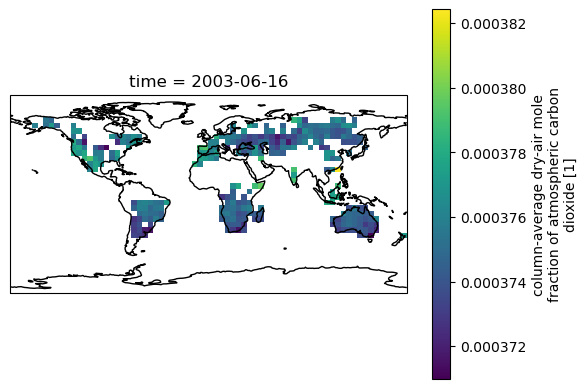

In [10]:

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
carbon_test.xco2[5,:,:].plot()

In [13]:
def plot_co2(time_index):
    
    """
    Plots CO2 levels at the specified time index using a PlateCarree projection map.
    
    Args:
        time_index (int): The time index of the CO2 data to be plotted.
        
    Returns:
        None
    """
    
    
    # Create a new figure with appropriate size
    fig = plt.figure(figsize=(12,6))
    
    # Create an axis with the PlateCarree projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Set the extent of the plot to cover the entire globe
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

    # Add coastlines to the plot
    ax.coastlines()

    # Plot the CO2 data with appropriate latitude and longitude coordinates
    img = ax.pcolormesh(carbon_test.lon, carbon_test.lat, carbon_test.xco2[time_index,:,:], 
                        cmap='viridis', transform=ccrs.PlateCarree())

    # Add gridlines and labels for latitude and longitude
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Add colorbar and labels
    plt.colorbar(img, label='CO2 levels', 
                 orientation='vertical',location = 'left', pad=0.05)
    plt.title(f'Time index: {time_index}')
    
    plt.show()




In [12]:
slider = widgets.IntSlider(min=0, max=len(carbon_test.xco2)-1, 
                           step=1, value=0, description='Time index')
widgets.interact(plot_co2, time_index=slider)


interactive(children=(IntSlider(value=0, description='Time index', max=227), Output()), _dom_classes=('widget-…

<function __main__.plot_co2(time_index)>